In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv(r'C:\Users\Mihir Patel\Downloads\Oasis\Task 5\Advertising.csv')

# Define features (TV, Radio, Newspaper) and target (Sales)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


c:\Users\Mihir Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 230.5543 - val_loss: 197.7982
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 199.5564 - val_loss: 187.8958
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 196.0497 - val_loss: 175.7708
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 208.6722 - val_loss: 160.2024
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 174.7931 - val_loss: 141.5229
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 161.6584 - val_loss: 118.5186
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 124.3829 - val_loss: 93.8817
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 89.6211 - val_loss: 69.7263
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.3220 - val_loss: 48.4084
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 42.6408 - val_loss: 32.8260
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26.5366 - val_loss: 22.9742
Epoch 12/100
13/13 ━━━━━━━━

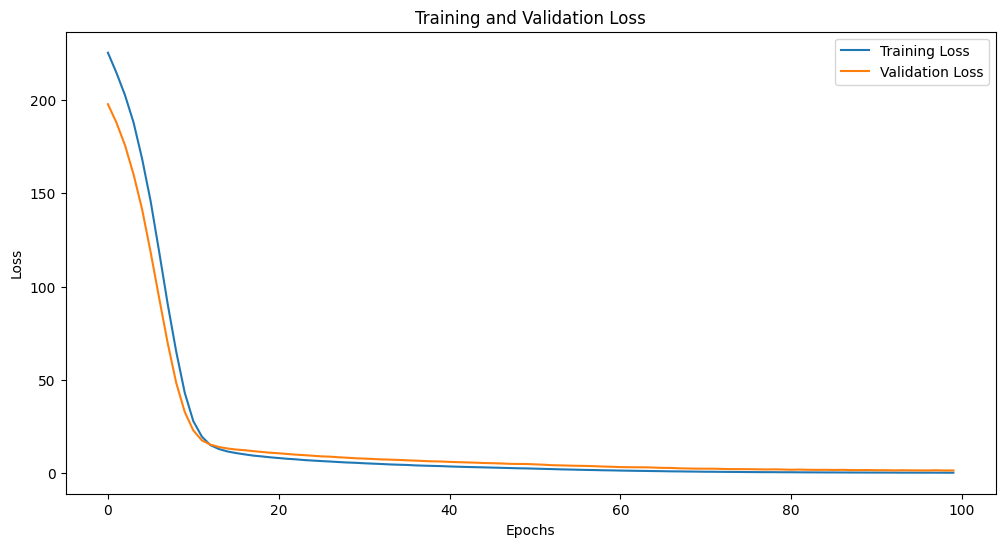

C:\Users\Mihir Patel\AppData\Local\Temp\ipykernel_5988\598314949.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')


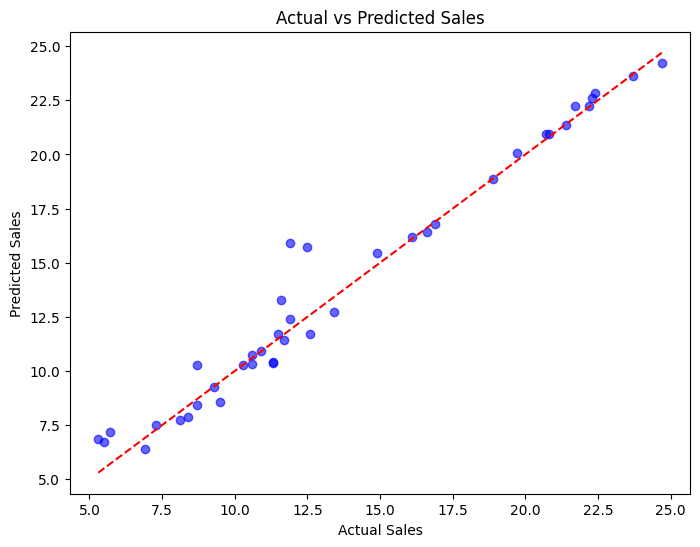

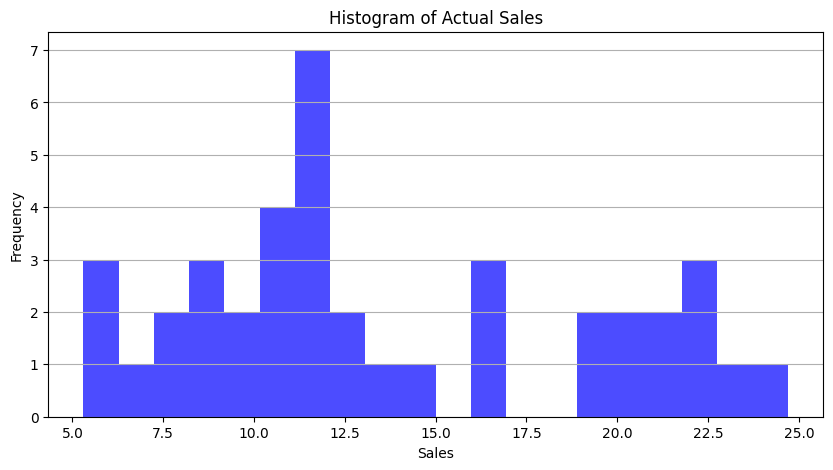

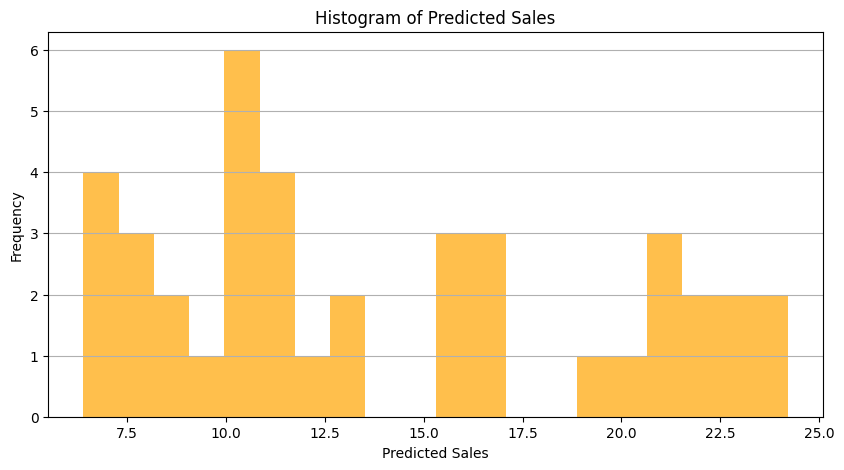

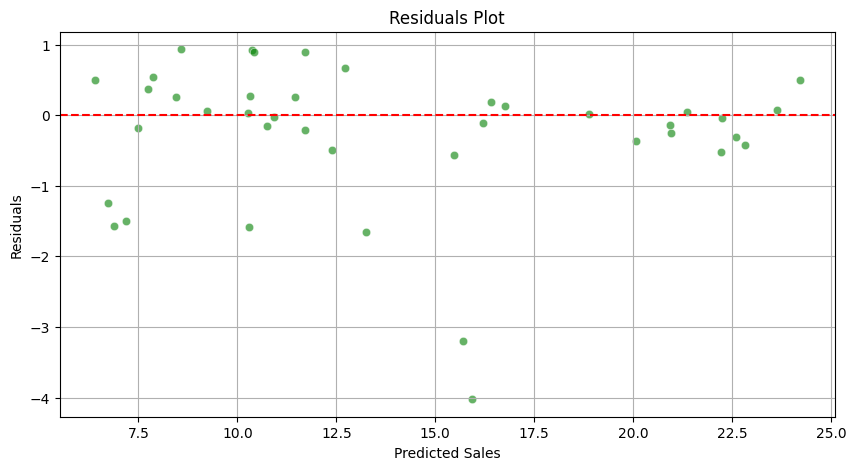

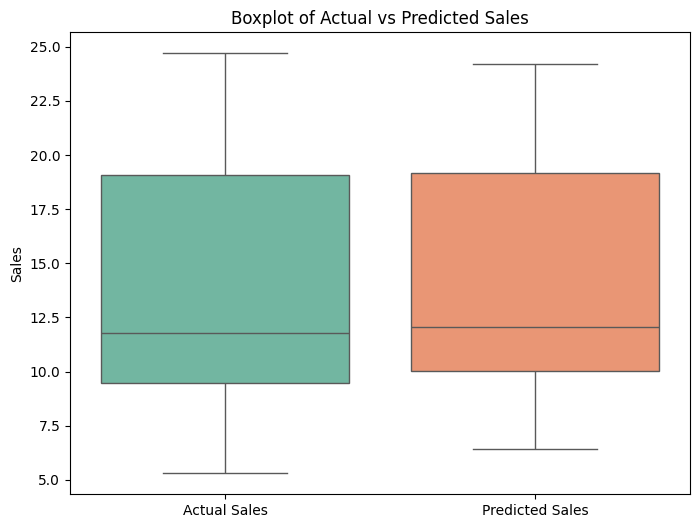

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Function to plot actual vs predicted sales
def plot_actual_vs_predicted(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title('Actual vs Predicted Sales')
    plt.show()

# Function to plot histogram of actual sales
def plot_actual_sales_histogram(y_test):
    plt.figure(figsize=(10, 5))
    plt.hist(y_test, bins=20, color='blue', alpha=0.7)
    plt.title('Histogram of Actual Sales')
    plt.xlabel('Sales')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Function to plot histogram of predicted sales
def plot_predicted_sales_histogram(y_pred):
    plt.figure(figsize=(10, 5))
    plt.hist(y_pred, bins=20, color='orange', alpha=0.7)
    plt.title('Histogram of Predicted Sales')
    plt.xlabel('Predicted Sales')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Function to plot residuals
def plot_residuals(y_test, y_pred):
    residuals = y_test - y_pred.flatten()  # Flatten y_pred to make it 1D
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=y_pred.flatten(), y=residuals, color='green', alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residuals Plot')
    plt.xlabel('Predicted Sales')
    plt.ylabel('Residuals')
    plt.grid()
    plt.show()

# Function to plot boxplot of actual vs predicted sales
def plot_boxplot(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    data = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_pred.flatten()})
    sns.boxplot(data=data, palette='Set2')
    plt.title('Boxplot of Actual vs Predicted Sales')
    plt.ylabel('Sales')
    plt.show()

# Call the functions to visualize results
plot_training_history(history)  # Pass the training history
plot_actual_vs_predicted(y_test, y_pred)  # Pass actual and predicted sales
plot_actual_sales_histogram(y_test)  # Histogram of actual sales
plot_predicted_sales_histogram(y_pred)  # Histogram of predicted sales
plot_residuals(y_test, y_pred)  # Residuals plot
plot_boxplot(y_test, y_pred)  # Boxplot of actual vs predicted sales
